## TASK 2-Prediction Using Unsupervised Learning ( K Means)

### Sumanth Palla


### Unsupervised Learning

Clustering algorithms are a part of unsupervised machine learning algorithms. Why unsupervised ? Because, the target variable is not present. The model is trained based on given input variables which attempt to discover intrinsic groups (or clusters).


### What is K-Means Clustering?
K-Means clustering is an unsupervised learning algorithm. There is no labeled data for this clustering, unlike in supervised learning. K-Means performs division of objects into clusters that share similarities and are dissimilar to the objects belonging to another cluster. 

Iris Dataset is used to predict the type of a flower i.e, whether it is either setosa or virginica or versicolor

### Step-1: Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(sklearn.__version__)

1.19.2
1.1.3
0.11.0
0.23.2


### Step-2 : Loading of Datasets


In [2]:
from sklearn import datasets
iris= datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### Step-3: Preparing DataFrame from Iris dataset

In [51]:
df=pd.DataFrame(iris.data,columns=['sepal-length','sepal-width','petal-length','petal-width'])
df['target']=iris.target
df.head()

,sepal-length,sepal-width,petal-length,petal-width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
l=[]
for i in iris['target']:
    if i==0:
        l.append('Iris-Setosa')
    elif i==1:
        l.append('Iris-versicolor')
    else:
        l.append('Iris-Virginica')
df['Species']=pd.Series(l)
df.head()    

,sepal-length,sepal-width,petal-length,petal-width,target,Species
0,5.1,3.5,1.4,0.2,0,Iris-Setosa
1,4.9,3.0,1.4,0.2,0,Iris-Setosa
2,4.7,3.2,1.3,0.2,0,Iris-Setosa
3,4.6,3.1,1.5,0.2,0,Iris-Setosa
4,5.0,3.6,1.4,0.2,0,Iris-Setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   target        150 non-null    int32  
 5   Species       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [6]:
df.shape

(150, 6)

In [7]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:>

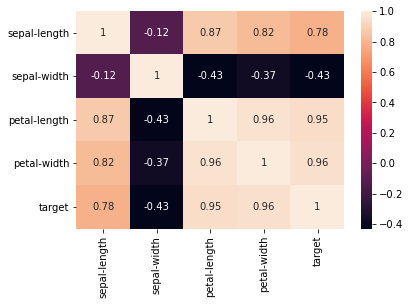

In [8]:
sns.heatmap(df.corr(),annot=True)

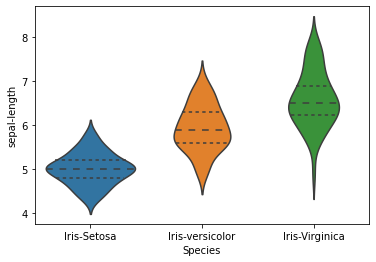

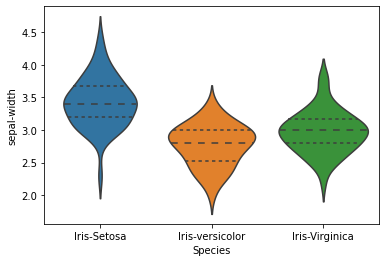

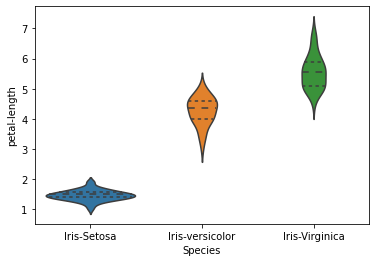

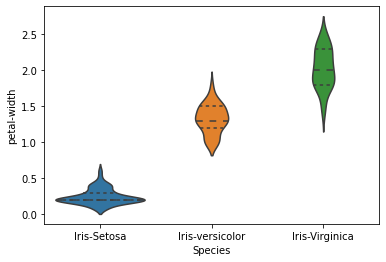

In [9]:
sns.violinplot(x='Species',y='sepal-length',data=df,inner='quartile')
plt.show()
sns.violinplot(x='Species',y='sepal-width',data=df,inner='quartile')
plt.show()
sns.violinplot(x='Species',y='petal-length',data=df,inner='quartile')
plt.show()
sns.violinplot(x='Species',y='petal-width',data=df,inner='quartile')
plt.show()

C:\Users\SUMANTH\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\SUMANTH\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\SUMANTH\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


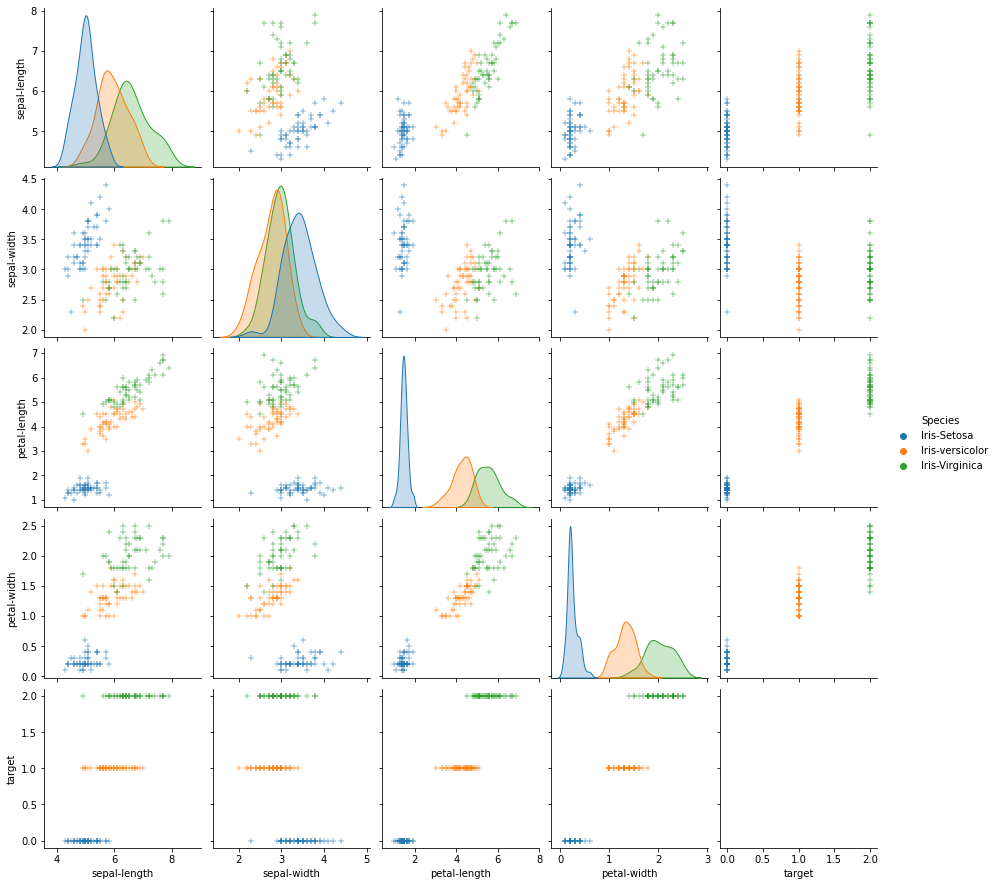

In [10]:
#df.drop('target',axis=1)
g=sns.pairplot(df,hue='Species',markers='+')
plt.show()

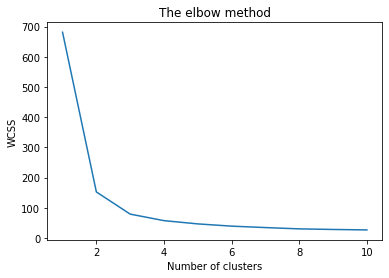

In [34]:
#Applying K means algorithm
x=df.iloc[:,[0,1,2,3]].values
#print(x)
wcss=[]
from sklearn.cluster import KMeans
l=list(range(0,11))
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [35]:
Y= np.array([df['target']])
X = df.iloc[:,[0,1,2,3]]
Y= Y.T
print(Y.shape)
print(X.shape)

(150, 1)
(150, 4)


In [36]:
#Applying K Means Algorithm to find the appropirate
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
print(x_train.shape,y_test.shape)
print(x_test.shape,y_test.shape)

(105, 4) (45, 1)
(45, 4) (45, 1)


In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=500,n_init=10,random_state=0)
y_kmeans=kmeans.fit(x)

In [38]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [39]:
print(x_test.shape)

(45, 4)


In [46]:
y_pred=kmeans.predict(x_test)
y_pred=np.array([y_pred])
y_pred=y_pred.T
print(y_pred)
print(y_test)

[[2]
 [2]
 [1]
 [0]
 [1]
 [0]
 [1]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [0]
 [2]
 [1]
 [2]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]
 [0]
 [1]
 [0]
 [1]
 [1]]
[[2]
 [1]
 [0]
 [2]
 [0]
 [2]
 [0]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [2]
 [1]
 [0]
 [0]
 [2]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [1]
 [0]
 [2]
 [2]
 [1]
 [0]
 [1]
 [1]
 [1]
 [2]
 [0]
 [2]
 [0]
 [0]]


In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.08888888888888889


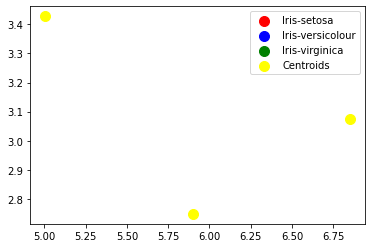

In [48]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In [50]:
from sklearn.metrics import classification_report

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print(classification_report(df['target'],kmeans.labels_,target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        50
Iris-versicolor       0.00      0.00      0.00        50
 Iris-virginica       0.23      0.28      0.25        50

       accuracy                           0.09       150
      macro avg       0.08      0.09      0.08       150
   weighted avg       0.08      0.09      0.08       150



### Thank You
